# Classification with Neural Networks

In machine learning, classification means categorizing the known classes, For example, categorizing the most profitable and non-interested customers from a dataset for advertising a particular product. let's have trained a classification model with a machin learning algorithm before. 

Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, need to use a neural network. 

MNIST fashion dataset, which contains 70,000 clothing fashion images.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-09-26 20:54:43.691047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion= keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest)= fashion.load_data()

Before moving forward, let's have a quick look at one of the samples of the images from the dataset:

Image Label:  5


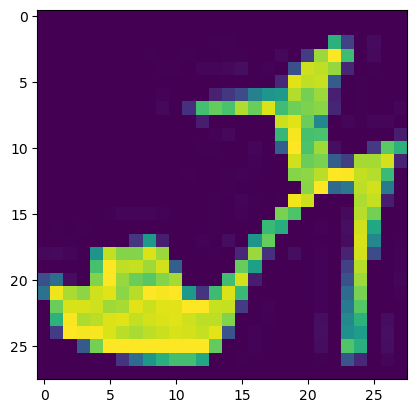

In [7]:
imgIndex=9
image= xtrain[imgIndex]
print("Image Label: ", ytrain[imgIndex])
plt.imshow(image)

Now let's have a look at the shape of both the training and test data:

In [8]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Building a Neural Network Architecture


Now i will build a neural network architecture with two hidden layers:

In [10]:
model= keras.models.Sequential([ keras.layers.Flatten(input_shape=[28,28]), 
                               keras.layers.Dense(300, activation= "relu"),
                               keras.layers.Dense(100, activation= "relu"),
                               keras.layers.Dense(10, activation= "softmax")])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Before training our model, I will split the training data into training and validation sets:

In [12]:
xvalid, xtrain= xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain= ytrain[:5000], ytrain[5000:]

Now here's how we can train a neural network for the task of image classification:

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "sgd", metrics=["accuracy"])

In [15]:
history= model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6940 - loss: 0.9955 - val_accuracy: 0.8342 - val_loss: 0.5010
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8245 - loss: 0.5046 - val_accuracy: 0.8490 - val_loss: 0.4550
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8431 - loss: 0.4514 - val_accuracy: 0.8528 - val_loss: 0.4318
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8514 - loss: 0.4237 - val_accuracy: 0.8622 - val_loss: 0.3989
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8600 - loss: 0.3995 - val_accuracy: 0.8676 - val_loss: 0.3862
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8636 - loss: 0.3843 - val_accuracy: 0.8524 - val_loss: 0.4007
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8686 - loss: 0.3731 - val_accuracy: 0.8614 - val_loss: 0.3934
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8746 -

Now let's have a look at the predictions:

In [16]:
new= xtest[:5]
predictions= model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00293031 0.         0.         0.         0.         0.
  0.9970697  0.         0.         0.        ]]


Here is how we can look at the prediction classes:

In [17]:
classes= np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


This is how we can train a classification model with neural networks using python.


#### Summary

Classification is the task of categorical the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, need to use a neural network.